In [248]:
%matplotlib inline

import numpy as np
from numpy.lib.recfunctions import append_fields
import matplotlib
import matplotlib.pyplot as plt
import halotools.mock_observables as mo
import halotools.sim_manager as sm
import astropy.coordinates as coord

In [249]:
nbins = 20
#mthresh = 5e10
#vrat_frac = 0.3
#vhost_min = 250.0
#lbox = 250.0

In [250]:
fname = './l0250_d200b.catalog' # file name to z0.0.catalog
mthresh = 1e10  # threshold mass in Msun/h
#vrat_frac = 0.25
vhost_min = 200.0
#lbox = 250.0 # box length in Mpc/h

# define dict pointing to all marks of interest
rs_dict = {'halo_id':(0,'i8'), 'halo_mass':(2,'f8'), 'halo_vmax':(3,'f8'), 'halo_rvir':(5,'f8'),
           'halo_rs':(6,'f8'), 'halo_x':(8,'f8'), 'halo_y':(9,'f8'), 'halo_z':(10,'f8'),
           'halo_spin':(17,'f8'), 'halo_ctoa':(28, 'f8'), 'halo_pid':(41,'i8')}

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_eq_dict={'halo_pid':-1}, 
                              row_cut_min_dict={'halo_mass':mthresh, 'halo_vmax':vhost_min})
_data = reader.read_ascii()

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_neq_dict={'halo_pid':-1},
                              row_cut_min_dict={'halo_mass':mthresh})
subs_data = reader.read_ascii()
vratio = [subs_data[i]['halo_vmax'] / hosts_data['halo_vmax'][np.where(hosts_data['halo_id']==subs_data[i]['halo_pid'])]
          for i in range(len(subs_data))]
matcher = [vratio[i] >= vrat_frac for i in range(len(vratio))]
subs_cut_data = subs_data[np.where(matcher)]
nsat_count = [float(len(subs_cut_data[np.where(subs_cut_data['halo_pid']==hosts_data[i]['halo_id'])])) 
              for i in range(len(hosts_data))]
n_sat, bins_sat = np.histogram(np.log10(hosts_data['halo_mass']), bins=nbins, weights=nsat_count)
n_host, bins_host = np.histogram(np.log10(hosts_data['halo_mass']), bins=nbins)
n_norm_a = n_sat/n_host
bins_mid_a = [ (bins_sat[i+1]+bins_sat[i])/2 for i in range(0,nbins)]


...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0250_d200b.catalog
 
Total number of rows in detected data = 2501871
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 19.88 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0250_d200b.catalog
 
Total number of rows in detected data = 2501871
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 19.58 seconds





...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d200b.catalog
 
Total number of rows in detected data = 2016442
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 15.17 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0250_d200b.catalog
 
Total number of rows in detected data = 2501871
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 19.93 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0500_d200b.catalog
 
Total number of rows in detected data = 3110333
Number of rows in detected header = 16 

... working on chunk 0 of 2
... working on chunk 1 of 2
Total runtime to read in ASCII = 23.91 seconds


limits assuming that vratio = 0.3
('l0125 vhost_max = ', 133.33333333333334)
('l0250 vhost_max = ', 233.33333333333334)
('l0500 vhost_max = ', 400.0)


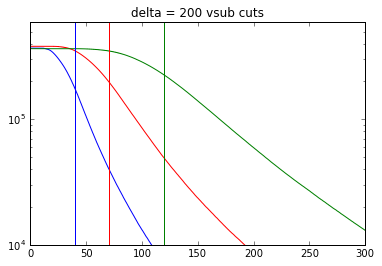

In [251]:
fname_l0125 = './l0125_d200b.catalog' # file name to z0.0.catalog
fname_l0250 = './l0250_d200b.catalog'
fname_l0500 = './l0500_d200b.catalog'

nbins=50

# define dict pointing to all marks of interest
rs_dict = {'halo_id':(0,'i8'), 'halo_mass':(2,'f8'), 'halo_vmax':(3,'f8'), 'halo_rvir':(5,'f8'),
           'halo_rs':(6,'f8'), 'halo_x':(8,'f8'), 'halo_y':(9,'f8'), 'halo_z':(10,'f8'),
           'halo_spin':(17,'f8'), 'halo_ctoa':(28, 'f8'), 'halo_pid':(41,'i8')}

reader = sm.TabularAsciiReader(fname_l0125, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0125 = np.sort(subs_data['halo_vmax'])

reader = sm.TabularAsciiReader(fname_l0250, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0250 = np.sort(subs_data['halo_vmax'])

reader = sm.TabularAsciiReader(fname_l0500, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0500 = np.sort(subs_data['halo_vmax'])

plt.step(sorted_l0125[::-1], np.arange(sorted_l0125.size), 'b')
plt.step(sorted_l0250[::-1], np.arange(sorted_l0250.size), 'r')
plt.step(sorted_l0500[::-1], np.arange(sorted_l0500.size), 'g')
plt.yscale('log')
plt.xlim(0,300)
plt.ylim(1e4, 6e5)
plt.title('delta = 200 vsub cuts')
plt.axvline(x=40, color='b')
plt.axvline(x=70, color='r')
plt.axvline(x=120, color='g')

print('limits assuming that vratio = 0.3')
print('l0125 vhost_max = ', 40/0.3)
print('l0250 vhost_max = ', 70/0.3)
print('l0500 vhost_max = ',120/0.3)


...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d100b.catalog
 
Total number of rows in detected data = 2080879
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 18.32 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0250_d100b.catalog
 
Total number of rows in detected data = 2610326
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 20.17 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0500_d100b.catalog
 
Total number of rows in detected data = 3292814
Number of rows in detected header = 16 

... working on chunk 0 of 2
... working on chunk 1 of 2
Total runtime to read in ASCII = 28.93 seconds


limits assuming that vratio = 0.3
('l0125 vhost_max = ', 133.33333333333334)
('l0250 vhost_max = ', 233.33333333333334)
('l0500 vhost_max = ', 400.0)


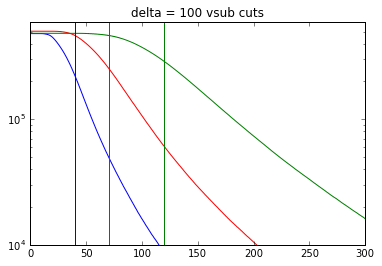

In [252]:
fname_l0125 = './l0125_d100b.catalog' # file name to z0.0.catalog
fname_l0250 = './l0250_d100b.catalog'
fname_l0500 = './l0500_d100b.catalog'

nbins=50

# define dict pointing to all marks of interest
rs_dict = {'halo_id':(0,'i8'), 'halo_mass':(2,'f8'), 'halo_vmax':(3,'f8'), 'halo_rvir':(5,'f8'),
           'halo_rs':(6,'f8'), 'halo_x':(8,'f8'), 'halo_y':(9,'f8'), 'halo_z':(10,'f8'),
           'halo_spin':(17,'f8'), 'halo_ctoa':(28, 'f8'), 'halo_pid':(41,'i8')}

reader = sm.TabularAsciiReader(fname_l0125, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0125 = np.sort(subs_data['halo_vmax'])

reader = sm.TabularAsciiReader(fname_l0250, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0250 = np.sort(subs_data['halo_vmax'])

reader = sm.TabularAsciiReader(fname_l0500, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0500 = np.sort(subs_data['halo_vmax'])

plt.step(sorted_l0125[::-1], np.arange(sorted_l0125.size), 'b')
plt.step(sorted_l0250[::-1], np.arange(sorted_l0250.size), 'r')
plt.step(sorted_l0500[::-1], np.arange(sorted_l0500.size), 'g')
plt.yscale('log')
plt.xlim(0,300)
plt.ylim(1e4, 6e5)
plt.title('delta = 100 vsub cuts')
plt.axvline(x=40, color='b')
plt.axvline(x=70, color='r')
plt.axvline(x=120, color='g')

print('limits assuming that vratio = 0.3')
print('l0125 vhost_max = ', 40/0.3)
print('l0250 vhost_max = ', 70/0.3)
print('l0500 vhost_max = ',120/0.3)


...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d75b.catalog
 
Total number of rows in detected data = 2102150
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 16.21 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0250_d75b.catalog
 
Total number of rows in detected data = 2649452
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 20.84 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0500_d75b.catalog
 
Total number of rows in detected data = 3361605
Number of rows in detected header = 16 

... working on chunk 0 of 2
... working on chunk 1 of 2
Total runtime to read in ASCII = 26.48 seconds


limits assuming that vratio = 0.3
('l0125 vhost_max = ', 133.33333333333334)
('l0250 vhost_max = ', 233.33333333333334)
('l0500 vhost_max = ', 400.0)


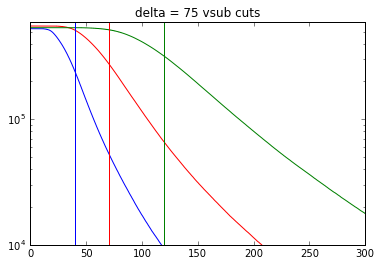

In [253]:
fname_l0125 = './l0125_d75b.catalog' # file name to z0.0.catalog
fname_l0250 = './l0250_d75b.catalog'
fname_l0500 = './l0500_d75b.catalog'

nbins=50

# define dict pointing to all marks of interest
rs_dict = {'halo_id':(0,'i8'), 'halo_mass':(2,'f8'), 'halo_vmax':(3,'f8'), 'halo_rvir':(5,'f8'),
           'halo_rs':(6,'f8'), 'halo_x':(8,'f8'), 'halo_y':(9,'f8'), 'halo_z':(10,'f8'),
           'halo_spin':(17,'f8'), 'halo_ctoa':(28, 'f8'), 'halo_pid':(41,'i8')}

reader = sm.TabularAsciiReader(fname_l0125, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0125 = np.sort(subs_data['halo_vmax'])

reader = sm.TabularAsciiReader(fname_l0250, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0250 = np.sort(subs_data['halo_vmax'])

reader = sm.TabularAsciiReader(fname_l0500, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0500 = np.sort(subs_data['halo_vmax'])

plt.step(sorted_l0125[::-1], np.arange(sorted_l0125.size), 'b')
plt.step(sorted_l0250[::-1], np.arange(sorted_l0250.size), 'r')
plt.step(sorted_l0500[::-1], np.arange(sorted_l0500.size), 'g')
plt.yscale('log')
plt.xlim(0,300)
plt.ylim(1e4, 6e5)
plt.title('delta = 75 vsub cuts')
plt.axvline(x=40, color='b')
plt.axvline(x=70, color='r')
plt.axvline(x=120, color='g')

print('limits assuming that vratio = 0.3')
print('l0125 vhost_max = ', 40/0.3)
print('l0250 vhost_max = ', 70/0.3)
print('l0500 vhost_max = ',120/0.3)


...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d50b.catalog
 
Total number of rows in detected data = 2122236
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 16.21 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0250_d50b.catalog
 
Total number of rows in detected data = 2692442
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 20.78 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0500_d50b.catalog
 
Total number of rows in detected data = 3442920
Number of rows in detected header = 16 

... working on chunk 0 of 2
... working on chunk 1 of 2
Total runtime to read in ASCII = 26.63 seconds


limits assuming that vratio = 0.3
('l0125 vhost_max = ', 133.33333333333334)
('l0250 vhost_max = ', 233.33333333333334)
('l0500 vhost_max = ', 400.0)


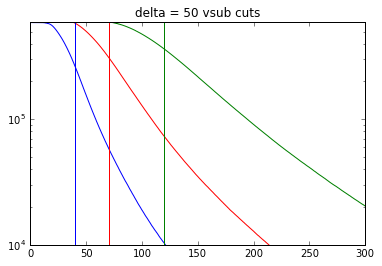

In [254]:
fname_l0125 = './l0125_d50b.catalog' # file name to z0.0.catalog
fname_l0250 = './l0250_d50b.catalog'
fname_l0500 = './l0500_d50b.catalog'

nbins=50

# define dict pointing to all marks of interest
rs_dict = {'halo_id':(0,'i8'), 'halo_mass':(2,'f8'), 'halo_vmax':(3,'f8'), 'halo_rvir':(5,'f8'),
           'halo_rs':(6,'f8'), 'halo_x':(8,'f8'), 'halo_y':(9,'f8'), 'halo_z':(10,'f8'),
           'halo_spin':(17,'f8'), 'halo_ctoa':(28, 'f8'), 'halo_pid':(41,'i8')}

reader = sm.TabularAsciiReader(fname_l0125, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0125 = np.sort(subs_data['halo_vmax'])

reader = sm.TabularAsciiReader(fname_l0250, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0250 = np.sort(subs_data['halo_vmax'])

reader = sm.TabularAsciiReader(fname_l0500, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0500 = np.sort(subs_data['halo_vmax'])

plt.step(sorted_l0125[::-1], np.arange(sorted_l0125.size), 'b')
plt.step(sorted_l0250[::-1], np.arange(sorted_l0250.size), 'r')
plt.step(sorted_l0500[::-1], np.arange(sorted_l0500.size), 'g')
plt.yscale('log')
plt.xlim(0,300)
plt.ylim(1e4, 6e5)
plt.title('delta = 50 vsub cuts')
plt.axvline(x=40, color='b')
plt.axvline(x=70, color='r')
plt.axvline(x=120, color='g')

print('limits assuming that vratio = 0.3')
print('l0125 vhost_max = ', 40/0.3)
print('l0250 vhost_max = ', 70/0.3)
print('l0500 vhost_max = ',120/0.3)


...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d10b.catalog
 
Total number of rows in detected data = 2095780
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 18.65 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0250_d200b.catalog
 
Total number of rows in detected data = 2501871
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 19.44 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0500_d340b.catalog
 
Total number of rows in detected data = 2963478
Number of rows in detected header = 16 

... working on chunk 0 of 2
... working on chunk 1 of 2
Total runtime to read in ASCII = 26.06 seconds


limits assuming that vratio = 0.3
('l0125 vhost_max = ', 133.33333333333334)
('l0250 vhost_max = ', 233.33333333333334)
('l0500 vhost_max = ', 400.0)


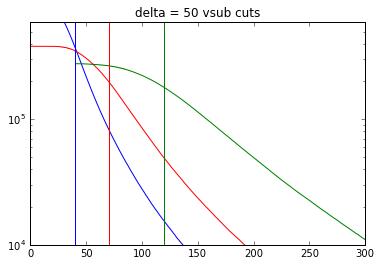

In [255]:
fname_l0125 = './l0125_d10b.catalog' # file name to z0.0.catalog
fname_l0250 = './l0250_d200b.catalog'
fname_l0500 = './l0500_d340b.catalog'

nbins=50

# define dict pointing to all marks of interest
rs_dict = {'halo_id':(0,'i8'), 'halo_mass':(2,'f8'), 'halo_vmax':(3,'f8'), 'halo_rvir':(5,'f8'),
           'halo_rs':(6,'f8'), 'halo_x':(8,'f8'), 'halo_y':(9,'f8'), 'halo_z':(10,'f8'),
           'halo_spin':(17,'f8'), 'halo_ctoa':(28, 'f8'), 'halo_pid':(41,'i8')}

reader = sm.TabularAsciiReader(fname_l0125, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0125 = np.sort(subs_data['halo_vmax'])

reader = sm.TabularAsciiReader(fname_l0250, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0250 = np.sort(subs_data['halo_vmax'])

reader = sm.TabularAsciiReader(fname_l0500, rs_dict, row_cut_neq_dict={'halo_pid':-1})
subs_data = reader.read_ascii()
sorted_l0500 = np.sort(subs_data['halo_vmax'])

plt.step(sorted_l0125[::-1], np.arange(sorted_l0125.size), 'b')
plt.step(sorted_l0250[::-1], np.arange(sorted_l0250.size), 'r')
plt.step(sorted_l0500[::-1], np.arange(sorted_l0500.size), 'g')
plt.yscale('log')
plt.xlim(0,300)
plt.ylim(1e4, 6e5)
plt.title('delta = 50 vsub cuts')
plt.axvline(x=40, color='b')
plt.axvline(x=70, color='r')
plt.axvline(x=120, color='g')

print('limits assuming that vratio = 0.3')
print('l0125 vhost_max = ', 40/0.3)
print('l0250 vhost_max = ', 70/0.3)
print('l0500 vhost_max = ',120/0.3)

Choosing 135, 235, and 400 as our cutoffs in practice.